In [2]:
import pandas as pd
import numpy as np

# Векторизованные операции над строками

их использование для частичной очистки очень зашумленного набора данных

Векторизация операций упрощает синтаксис работы с массивами данных: больше нет необходимости беспокоиться о размере или форме массива, а только о нужной нам операции. Например:

In [3]:
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

In [5]:
# но для массива строк:
data = ['Peter', 'Paul', 'MARy', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [7]:
# атрибут str объектов Series библиотеки Pandas
names = pd.Series(data)
names.str.capitalize()

0    Peter
1     Paul
2     Mary
3    Guido
dtype: object

### методы объекта str:
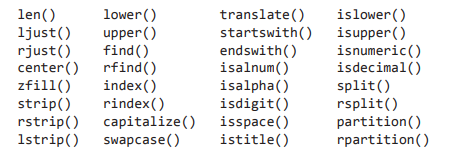

Часть из них возвращает Series строк (например, lower, upper), часть - числовые значения (например, len), часть - булевы значения (например, startswith)

###  методы, использующие регулярные выражения
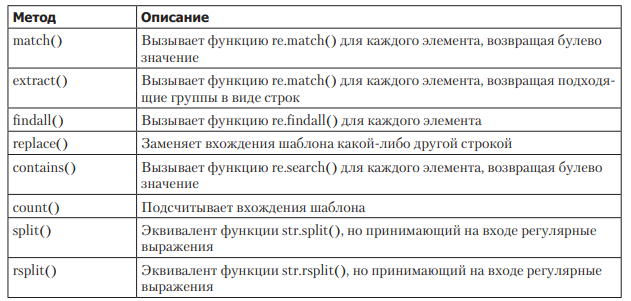

In [9]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam', 'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [10]:
# извлечь имена
monte.str.extract('([A-Za-z]+)')

,0
0,Graham
1,John
2,Terry
3,Eric
4,Terry
5,Michael


In [12]:
# найти все имена, начинающиеся и заканчивающиеся согласным звуком
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

### прочие методы 
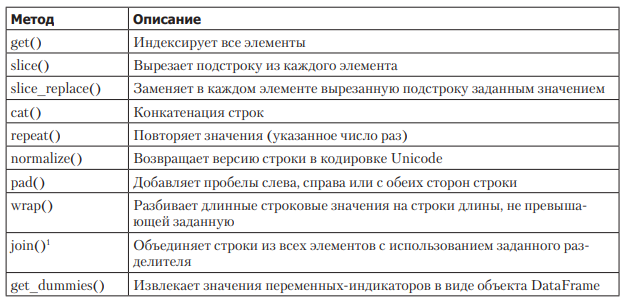

In [16]:
# Векторизованный доступ к элементам и вырезание подстрок
print(monte.str.slice(0, 3))  # или monte.str[0:3]
print(monte.str.split().str.get(-1))  # извлечение фамилии из каждой записи

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object
0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object


In [19]:
# Индикаторные переменные
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C', 'B|C|D']})
# где A="родился в США", B="родился в Великобритании", C="любит сыр", D="любит мясные консервы"
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [20]:
# метод get_dummies() дает возможность быстро разбить все индикаторные переменные, преобразовав их в DataFrame
full_monte['info'].str.get_dummies()

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1
